In [92]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import(ModelSpec as MS,summarize)

In [93]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import\
    (LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [94]:
Weekly = pd.read_csv('Weekly.csv')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [95]:
# Check for missing data
assert Weekly.isnull().sum().sum() == 0

In [96]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [143]:
Weekly.corr()

/var/folders/b1/_lbgm2qn7lj0s6f8mq3gk_0h0000gn/T/ipykernel_3421/2431327265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


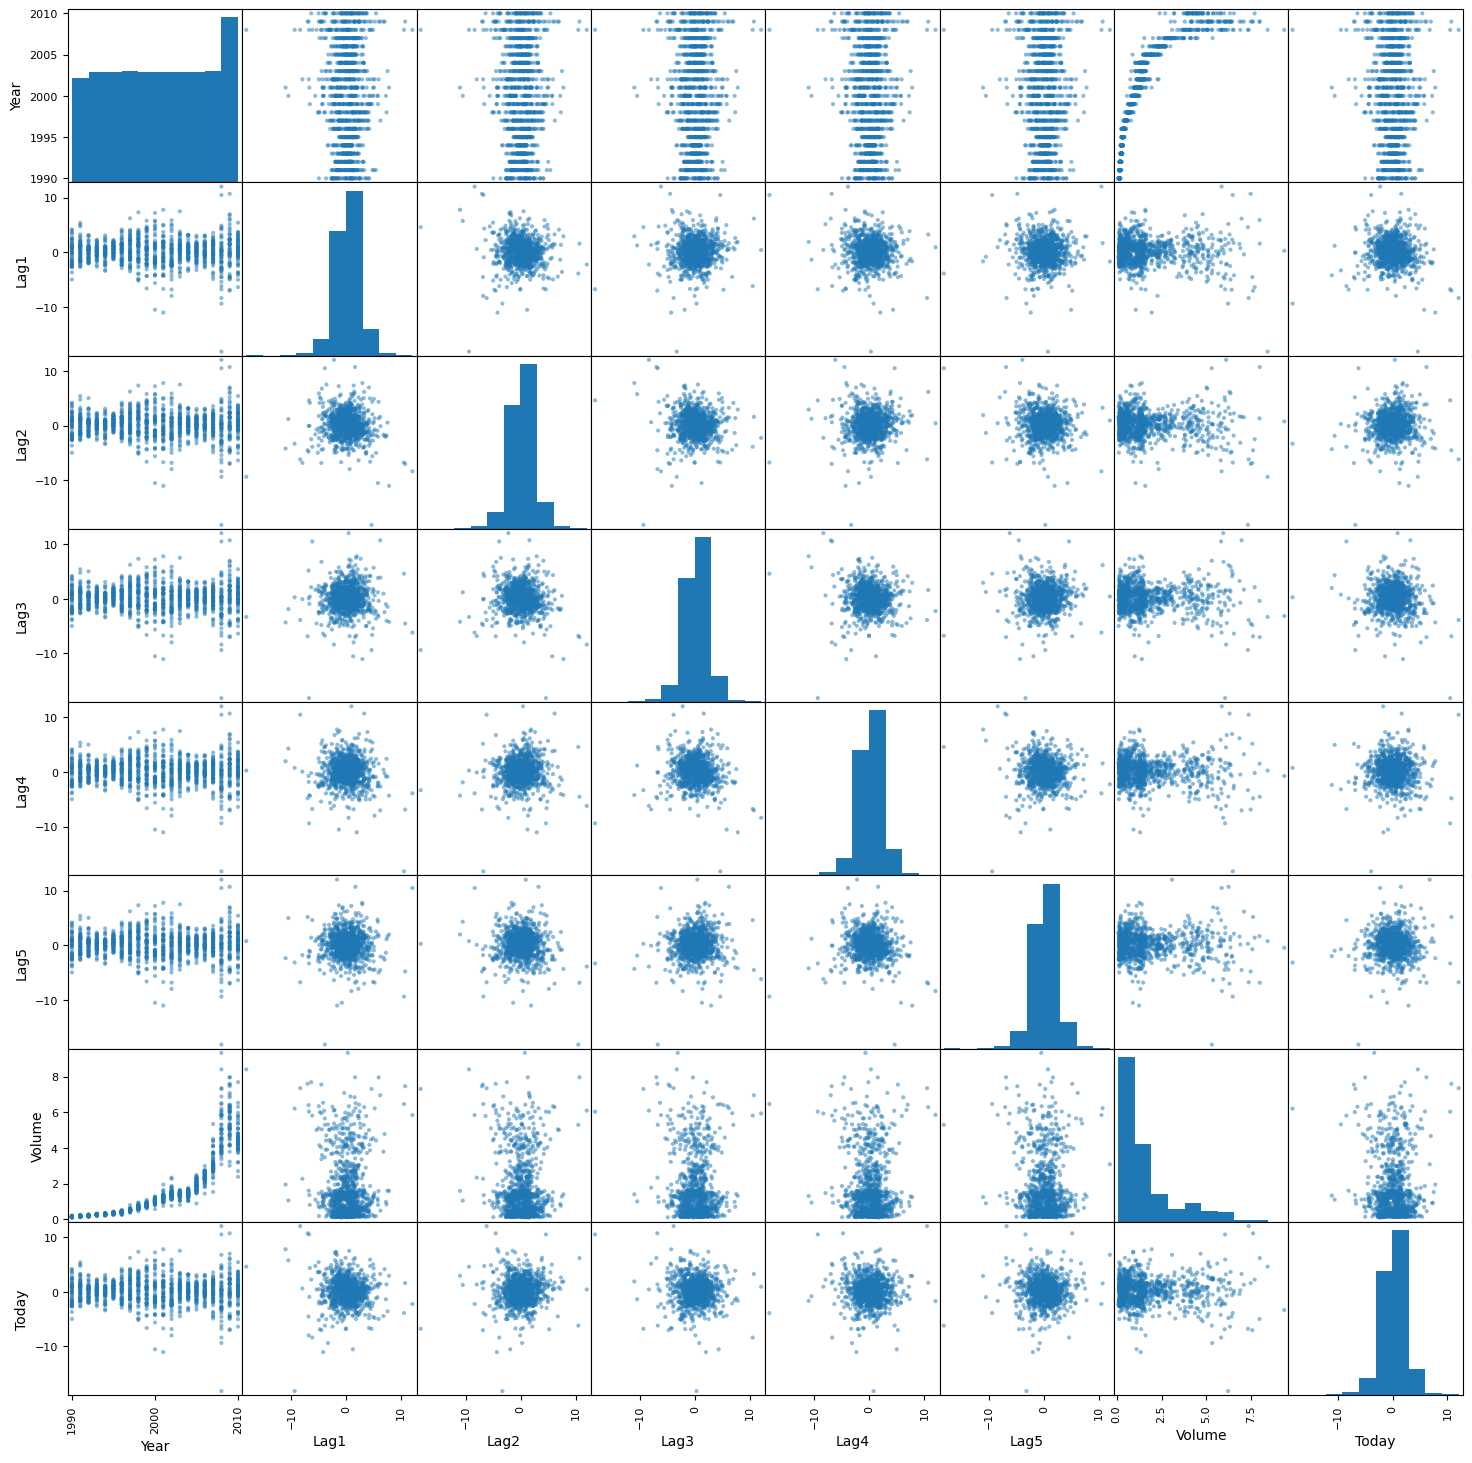

In [98]:
pd.plotting.scatter_matrix(Weekly,figsize=(18,18));

In [99]:
#According to correlations and graphical summaries of weekly dataset,The Year/Volume relationship is the only 
#one with a visible pattern


In [100]:
#13.(b)
allvars = Weekly.columns.drop(['Today','Direction','Year'])
design = MS(allvars)
X=design.fit_transform(Weekly)
y=Weekly.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results=glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [101]:
results.params

intercept    0.266864
Lag1        -0.041269
Lag2         0.058442
Lag3        -0.016061
Lag4        -0.027790
Lag5        -0.014472
Volume      -0.022742
dtype: float64

In [102]:
results.pvalues

intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

In [103]:
#Lag2 seems to be a predictor with statistical significance. We can say that because Lag2 has a small P|z|, 
#meaning that there's a small probability that Lag2 coefficient is equal to zero.

In [104]:
probs=results.predict()
probs[:10]

array([0.60862494, 0.60103144, 0.58756995, 0.48164156, 0.61690129,
       0.56841902, 0.57860971, 0.51519724, 0.57151998, 0.55542873])

In [105]:
#13.(c)
labels = np.array(['Down'] * 1089)
labels[probs > 0.5] = 'Up'
confusion_table(labels,Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [106]:
np.mean(labels==Weekly.Direction),(54+557)/1089

(0.5610651974288338, 0.5610651974288338)

In [107]:
#fraction of predictions correct: 0.56107
#True Positives (TP): 557 (Predicted Up, Truth Up)
#True Negatives (TN): 54 (Predicted Down, Truth Down)
#False Positives (FP): 48 (Predicted Up, Truth Down)
#False Negatives (FN): 430 (Predicted Down, Truth Up)
#logistic regression correctly predicted the movement of the market 56.1% of the time

In [108]:
#13.(d)
train=(Weekly.Year < 2009)
c_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 9)

In [145]:
model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)
X_train,X_test = X.loc[train],X.loc[~train]
y_train,y_test = y.loc[train],y.loc[~train]
glm_train = sm.GLM(y_train,X_train,family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog= X_test)

In [110]:
D = Weekly.Direction
L_train,L_test = D.loc[train],D.loc[~train]

In [111]:
labels = np.array(['Down'] * 104)
labels[probs > 0.5] = 'Up'
confusion_table(labels,L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [112]:
np.mean(labels == L_test),(9+56)/104

(0.625, 0.625)

In [113]:
#13.(e)LDA
lda = LDA(store_covariance=True)
X_train,X_test =[M.drop(columns=['intercept']) for M in [X_train,X_test]]
lda.fit(X_train,L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [115]:
lda_pred = lda.predict(X_test)

In [117]:
confusion_table(lda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [120]:
np.mean(labels == L_test),(9+56)/104

(0.625, 0.625)

In [126]:
#13.(f)QDA
qda = QDA(store_covariance=True)
qda.fit(X_train,L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [128]:
qda.means_,qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [130]:
qda.covariance_[0]

array([[4.83781758]])

In [123]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [132]:
np.mean(qda_pred == L_test),61/104

(0.5865384615384616, 0.5865384615384616)

In [134]:
#13.(g)KNN
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred,L_test)

Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [136]:
np.mean(knn1_pred == L_test),(21+31)/104

(0.5, 0.5)

In [138]:
#13.(h)Naive Bayes
NB =GaussianNB()
NB.fit(X_train,L_train)

GaussianNB()

In [140]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels,L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [142]:
np.mean(nb_labels==L_test),(61)/104

(0.5865384615384616, 0.5865384615384616)

In [146]:
#13.(i)
#The methods that appear to provide the best results are the logistic regression and 
#the linear discriminant analysis (LDA)They are the methods where score (overall fraction of correct predictions) 
#is higher

In [147]:
#13.(j)